In [697]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [698]:
data=pd.read_csv('SpeedBrakerAnalysisDataCombined.csv')

In [699]:
data['Date']=pd.to_datetime(data['Date'])

In [700]:
data.head()

,Date,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake
0,2018-07-13,0.256851,0,0.953125,0.000000,0
1,2018-07-13,0.358308,0,0.906250,9.656250,1
2,2018-07-13,0.461390,0,0.945312,9.406250,1
3,2018-07-13,0.561847,0,0.945312,9.203125,1
4,2018-07-13,0.661937,0,0.921875,9.031250,1


In [701]:
data.info()                 # There is no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              95140 non-null  datetime64[ns]
 1   TimeInSec         95140 non-null  float64       
 2   RealSpeedBreaker  95140 non-null  int64         
 3   ActualAz          95140 non-null  float64       
 4   VehSpeed          95140 non-null  float64       
 5   Brake             95140 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 4.4 MB


In [702]:
data.describe()

,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake
count,95140.000000,95140.000000,95140.000000,95140.000000,95140.000000
mean,942.356454,0.001125,0.966775,24.404933,0.272462
std,826.323774,0.033517,0.183433,15.326787,0.445228
min,0.069031,0.000000,-0.687500,0.000000,0.000000
25%,343.408630,0.000000,0.953125,13.029297,0.000000
50%,686.659748,0.000000,1.007812,24.054688,0.000000
75%,1268.170694,0.000000,1.054688,34.445312,1.000000
max,3324.321930,1.000000,3.070312,79.289062,1.000000


In [703]:
data.isna().sum()

Date                0
TimeInSec           0
RealSpeedBreaker    0
ActualAz            0
VehSpeed            0
Brake               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

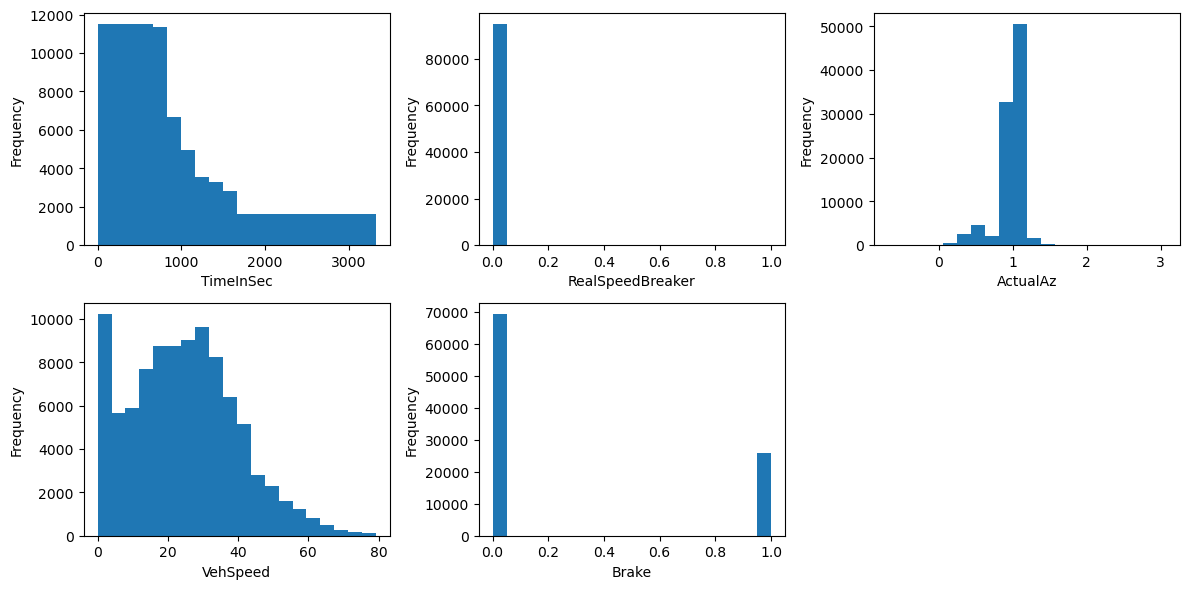

In [704]:
# Plot histograms of the all readings on each axis
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(data['TimeInSec'], bins=20)
plt.xlabel('TimeInSec')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(data['RealSpeedBreaker'], bins=20)
plt.xlabel('RealSpeedBreaker')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(data['ActualAz'], bins=20)
plt.xlabel('ActualAz')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(data['VehSpeed'], bins=20)
plt.xlabel('VehSpeed')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(data['Brake'], bins=20)
plt.xlabel('Brake')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show

In [705]:
data[data['RealSpeedBreaker']==1]

,Date,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake
3880,2018-07-13,392.237701,1,1.585938,11.976562,0
3924,2018-07-13,396.682091,1,1.929688,14.132812,0
5220,2018-07-13,527.577222,1,1.343750,12.710938,1
5282,2018-07-13,533.840258,1,1.484375,12.000000,0
9715,2018-12-07,72.842859,1,1.476562,12.273438,0
...,...,...,...,...,...,...
93950,2018-12-23,744.840742,1,1.367188,11.398438,0
94021,2018-12-23,752.012435,1,1.289062,12.562500,0
94266,2018-12-23,776.756630,1,1.234375,12.078125,0
94327,2018-12-23,782.917666,1,1.265625,17.015625,0


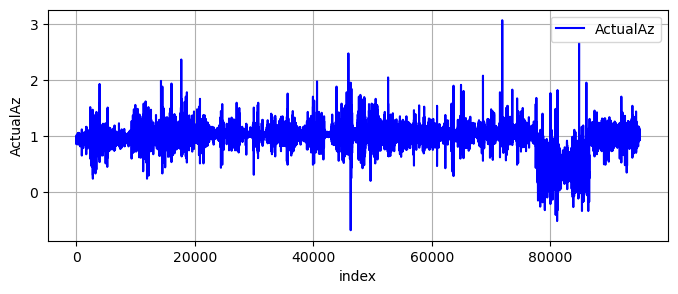

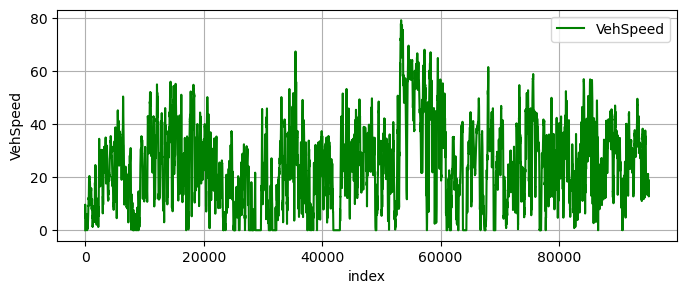

In [706]:
# Plot the ActualAz,VehSpeed values over index
plt.figure(figsize=(8, 3))
plt.plot(data.index, data['ActualAz'],'b', label='ActualAz')
plt.xlabel('index')
plt.ylabel('ActualAz')
plt.legend()
plt.grid(True)


plt.figure(figsize=(8, 3))
plt.plot(data.index, data['VehSpeed'],'g', label='VehSpeed')
plt.xlabel('index')
plt.ylabel('VehSpeed')
plt.legend()
plt.grid(True)
plt.show()

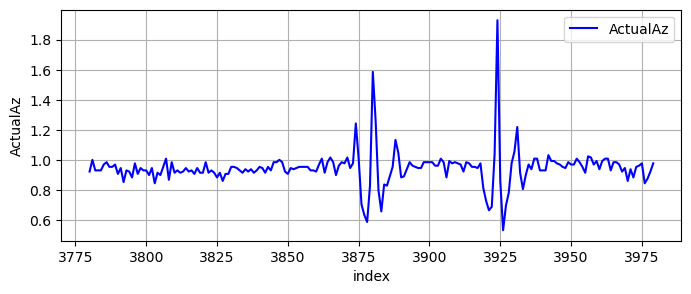

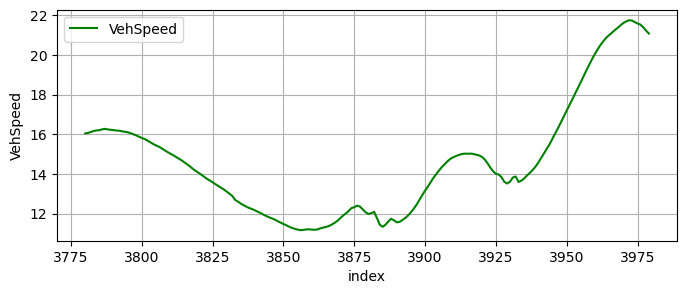

In [707]:
# Plot the ActualAz,VehSpeed values over index
plt.figure(figsize=(8, 3))
plt.plot(data.index[3780:3980], data['ActualAz'][3780:3980],'b', label='ActualAz')
plt.xlabel('index')
plt.ylabel('ActualAz')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(data.index[3780:3980], data['VehSpeed'][3780:3980], 'g',label='VehSpeed')
plt.xlabel('index')
plt.ylabel('VehSpeed')
plt.legend()
plt.grid(True)
plt.show()

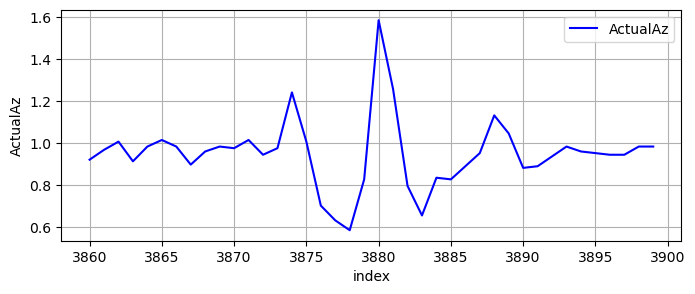

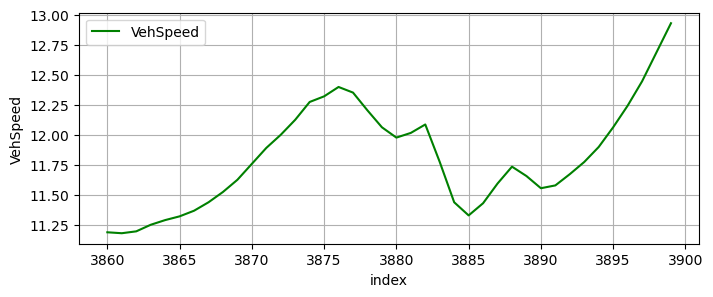

In [708]:
#3880
plt.figure(figsize=(8, 3))
plt.plot(data.index[3860:3900], data['ActualAz'][3860:3900],'b', label='ActualAz')
plt.xlabel('index')
plt.ylabel('ActualAz')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(data.index[3860:3900], data['VehSpeed'][3860:3900],'g', label='VehSpeed')
plt.xlabel('index')
plt.ylabel('VehSpeed')
plt.legend()
plt.grid(True)
plt.show()

In [709]:
window_size_3880=3883-3873
window_size_3880

10

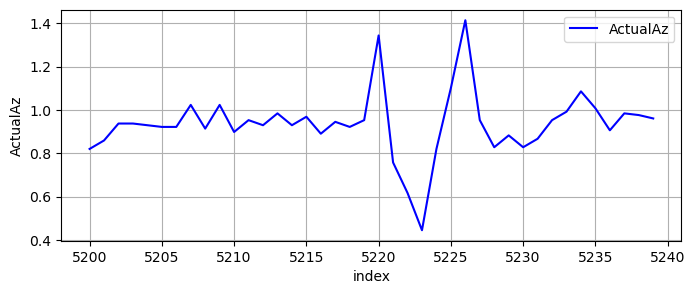

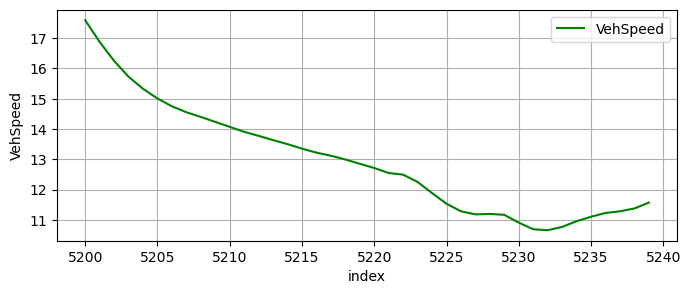

In [710]:
#5220
plt.figure(figsize=(8, 3))
plt.plot(data.index[5200:5240], data['ActualAz'][5200:5240],'b', label='ActualAz')
plt.xlabel('index')
plt.ylabel('ActualAz')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(data.index[5200:5240], data['VehSpeed'][5200:5240],'g', label='VehSpeed')
plt.xlabel('index')
plt.ylabel('VehSpeed')
plt.legend()
plt.grid(True)
plt.show()

In [711]:
window_size_5220=5228-5219
window_size_5220

9

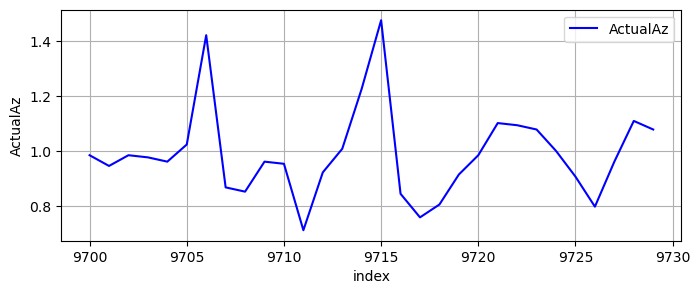

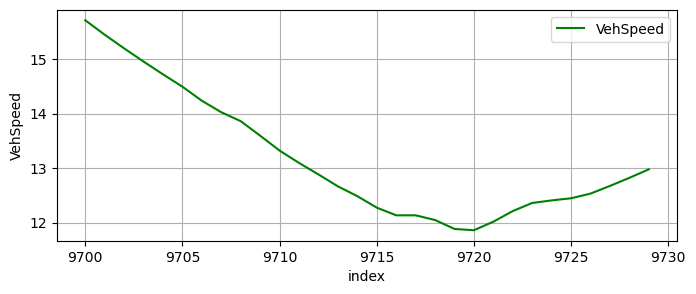

In [712]:
#9715
plt.figure(figsize=(8, 3))
plt.plot(data.index[9700:9730], data['ActualAz'][9700:9730],'b', label='ActualAz')
plt.xlabel('index')
plt.ylabel('ActualAz')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(data.index[9700:9730], data['VehSpeed'][9700:9730],'g', label='VehSpeed')
plt.xlabel('index')
plt.ylabel('VehSpeed')
plt.legend()
plt.grid(True)
plt.show()

In [713]:
window_size_9715=9717-9705 
window_size_9715

12

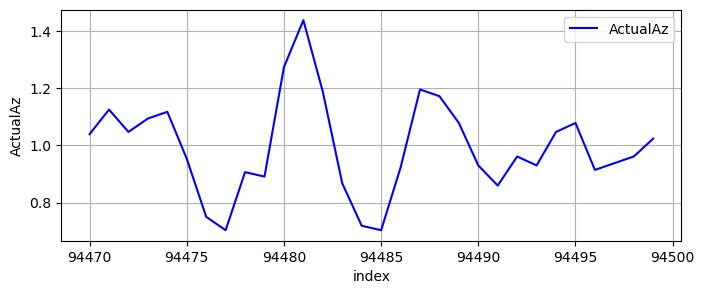

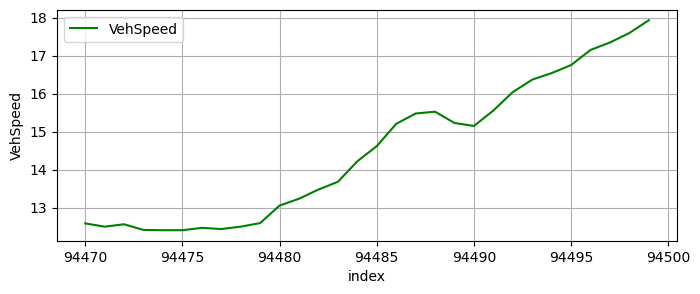

In [714]:
#94481
plt.figure(figsize=(8, 3))
plt.plot(data.index[94470:94500], data['ActualAz'][94470:94500],'b', label='ActualAz')
plt.xlabel('index')
plt.ylabel('ActualAz')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(data.index[94470:94500], data['VehSpeed'][94470:94500],'g', label='VehSpeed')
plt.xlabel('index')
plt.ylabel('VehSpeed')
plt.legend()
plt.grid(True)
plt.show()

In [715]:
window_size_94481=94491-94479
window_size_94481



12

In [716]:
# from the above graphs we consider window size is 20

In [717]:
data.head()

,Date,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake
0,2018-07-13,0.256851,0,0.953125,0.000000,0
1,2018-07-13,0.358308,0,0.906250,9.656250,1
2,2018-07-13,0.461390,0,0.945312,9.406250,1
3,2018-07-13,0.561847,0,0.945312,9.203125,1
4,2018-07-13,0.661937,0,0.921875,9.031250,1


In [718]:
data['RealSpeedBreaker'].value_counts()    #target column : data is imbalanced

0    95033
1      107
Name: RealSpeedBreaker, dtype: int64

In [719]:
end_date =data['Date'].max()
end_date

Timestamp('2018-12-23 00:00:00')

In [720]:
start_date =data['Date'].min()
start_date

Timestamp('2018-05-04 00:00:00')

In [721]:
from datetime import datetime
from datetime import datetime, timedelta

In [722]:
number_of_days=data['Date'].max() - data['Date'].min()
number_of_days

Timedelta('233 days 00:00:00')

In [723]:
# spliting a data into 80-20 ration,   80% of 233days is 186days

split_date = start_date  + pd.Timedelta(days=186)
print(split_date)

2018-11-06 00:00:00


In [724]:
# Split the data into training and testing sets based on the date

train_data = data[data['Date'] < split_date]
test_data = data[data['Date'] >= split_date]

In [725]:
print(train_data.shape, test_data.shape)

(69681, 6) (25459, 6)


In [726]:
train_data['Date'].nunique()

4

In [727]:
test_data['Date'].nunique()

3

In [728]:
data['Date'].nunique()

7

In [729]:
# Define the window size for the moving average  for X_train 
window_size = 20

# Calculate the moving average of accelerometer readings
columns = ['ActualAz','VehSpeed']
for column in columns:
    train_data[f'{column}_max'] = train_data[column].rolling(window=window_size).max()
    train_data[f'{column}_min'] = train_data[column].rolling(window=window_size).min()
    train_data[f'{column}_mean'] = train_data[column].rolling(window=window_size).mean()
    train_data[f'{column}_range'] = train_data[column].rolling(window=window_size).apply(lambda x: x.max() - x.min())
    train_data[f'{column}_std'] = train_data[column].rolling(window=window_size).apply(lambda x: x.std())


In [730]:
# Define the window size for the moving average  for X_train 
window_size = 20

# Calculate the moving average of accelerometer readings
columns = ['ActualAz','VehSpeed']
for column in columns:
    test_data[f'{column}_max'] = test_data[column].rolling(window=window_size).max()
    test_data[f'{column}_min'] = test_data[column].rolling(window=window_size).min()
    test_data[f'{column}_mean'] = test_data[column].rolling(window=window_size).mean()
    test_data[f'{column}_range'] = test_data[column].rolling(window=window_size).apply(lambda x: x.max() - x.min())
    test_data[f'{column}_std'] = test_data[column].rolling(window=window_size).apply(lambda x: x.std())


In [731]:
train_data.head()

,Date,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake,ActualAz_max,ActualAz_min,ActualAz_mean,ActualAz_range,ActualAz_std,VehSpeed_max,VehSpeed_min,VehSpeed_mean,VehSpeed_range,VehSpeed_std
0,2018-07-13,0.256851,0,0.953125,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-13,0.358308,0,0.906250,9.656250,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-13,0.461390,0,0.945312,9.406250,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-13,0.561847,0,0.945312,9.203125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-13,0.661937,0,0.921875,9.031250,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [732]:
test_data.head()

,Date,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake,ActualAz_max,ActualAz_min,ActualAz_mean,ActualAz_range,ActualAz_std,VehSpeed_max,VehSpeed_min,VehSpeed_mean,VehSpeed_range,VehSpeed_std
8997,2018-12-07,0.224714,0,0.843750,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8998,2018-12-07,0.325618,0,0.984375,14.671875,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8999,2018-12-07,0.426099,0,0.984375,14.609375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9000,2018-12-07,0.527465,0,1.007812,14.640625,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9001,2018-12-07,0.629381,0,0.984375,14.625000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [733]:
train_data.head()

,Date,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake,ActualAz_max,ActualAz_min,ActualAz_mean,ActualAz_range,ActualAz_std,VehSpeed_max,VehSpeed_min,VehSpeed_mean,VehSpeed_range,VehSpeed_std
0,2018-07-13,0.256851,0,0.953125,0.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-13,0.358308,0,0.906250,9.656250,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-13,0.461390,0,0.945312,9.406250,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-13,0.561847,0,0.945312,9.203125,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-13,0.661937,0,0.921875,9.031250,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


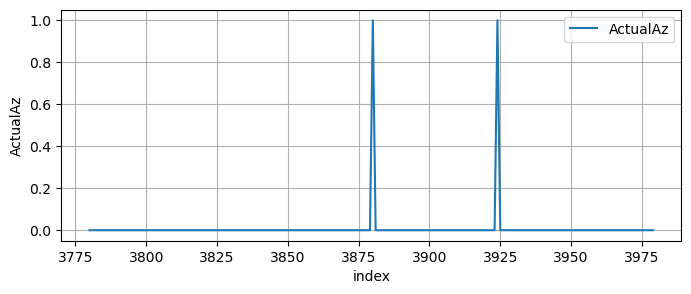

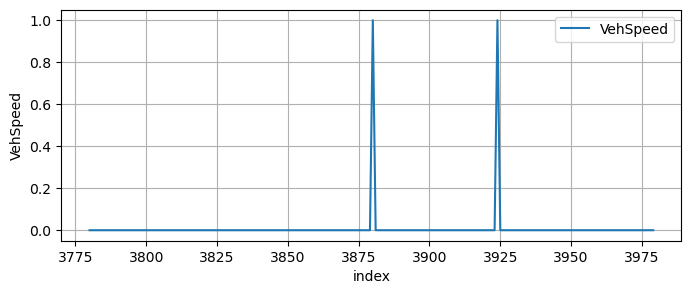

In [734]:
# Plot the acceleration values over time
plt.figure(figsize=(8, 3))
plt.plot(data.index[3780:3980], data['RealSpeedBreaker'][3780:3980], label='ActualAz')
plt.xlabel('index')
plt.ylabel('ActualAz')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(data.index[3780:3980], data['RealSpeedBreaker'][3780:3980], label='VehSpeed')
plt.xlabel('index')
plt.ylabel('VehSpeed')
plt.legend()
plt.grid(True)
plt.show()

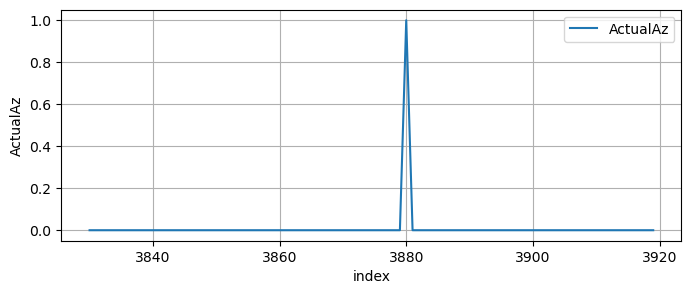

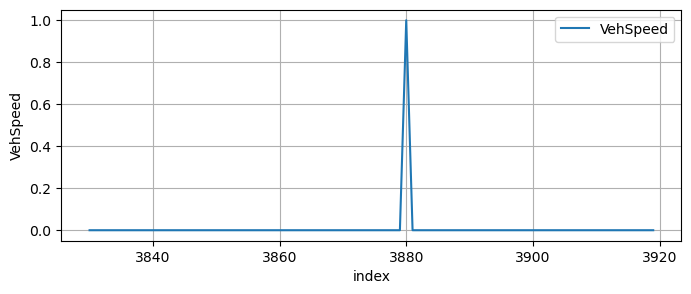

In [735]:
#3880
plt.figure(figsize=(8, 3))
plt.plot(data.index[3830:3920], data['RealSpeedBreaker'][3830:3920], label='ActualAz')
plt.xlabel('index')
plt.ylabel('ActualAz')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(data.index[3830:3920], data['RealSpeedBreaker'][3830:3920], label='VehSpeed')
plt.xlabel('index')
plt.ylabel('VehSpeed')
plt.legend()
plt.grid(True)
plt.show()

In [736]:
train_data['RealSpeedBreaker_max'] = train_data['RealSpeedBreaker'].rolling(window=window_size).max()
test_data['RealSpeedBreaker_max'] = test_data['RealSpeedBreaker'].rolling(window=window_size).max()

In [737]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [738]:
train_data.head()

,Date,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake,ActualAz_max,ActualAz_min,ActualAz_mean,ActualAz_range,ActualAz_std,VehSpeed_max,VehSpeed_min,VehSpeed_mean,VehSpeed_range,VehSpeed_std,RealSpeedBreaker_max
19,2018-07-13,2.175855,0,0.968750,5.687500,1,0.96875,0.851562,0.921484,0.117188,0.030886,9.656250,0.000000,7.485547,9.656250,2.127383,0.0
20,2018-07-13,2.277899,0,0.929688,5.484375,1,0.96875,0.851562,0.920312,0.117188,0.030055,9.656250,5.484375,7.759766,4.171875,1.307001,0.0
21,2018-07-13,2.378214,0,0.929688,5.304688,1,0.96875,0.851562,0.921484,0.117188,0.029935,9.406250,5.304688,7.542187,4.101562,1.336545,0.0
22,2018-07-13,2.479795,0,0.937500,5.148438,1,0.96875,0.851562,0.921094,0.117188,0.029657,9.203125,5.148438,7.329297,4.054688,1.362845,0.0
23,2018-07-13,2.581097,0,0.945312,5.007812,1,0.96875,0.851562,0.921094,0.117188,0.029657,9.031250,5.007812,7.119531,4.023438,1.381982,0.0


In [739]:
test_data.head()

,Date,TimeInSec,RealSpeedBreaker,ActualAz,VehSpeed,Brake,ActualAz_max,ActualAz_min,ActualAz_mean,ActualAz_range,ActualAz_std,VehSpeed_max,VehSpeed_min,VehSpeed_mean,VehSpeed_range,VehSpeed_std,RealSpeedBreaker_max
9016,2018-12-07,2.142751,0,0.976562,11.765625,1,1.039062,0.843750,0.967578,0.195312,0.040735,14.671875,0.000000,13.014844,14.671875,3.206310,0.0
9017,2018-12-07,2.244769,0,1.000000,11.562500,1,1.039062,0.898438,0.975391,0.140625,0.029042,14.671875,11.562500,13.592969,3.109375,1.060454,0.0
9018,2018-12-07,2.345406,0,0.968750,11.367188,1,1.039062,0.898438,0.974609,0.140625,0.028997,14.640625,11.367188,13.427734,3.273438,1.138113,0.0
9019,2018-12-07,2.445769,0,0.984375,11.164062,1,1.039062,0.898438,0.974609,0.140625,0.028997,14.640625,11.164062,13.255469,3.476562,1.208416,0.0
9020,2018-12-07,2.547401,0,1.007812,11.023438,1,1.039062,0.898438,0.974609,0.140625,0.028997,14.625000,11.023438,13.074609,3.601562,1.259788,0.0


In [740]:
X_train=train_data.drop(['ActualAz_mean','VehSpeed_range','VehSpeed_std','Brake','TimeInSec','ActualAz','VehSpeed','RealSpeedBreaker','RealSpeedBreaker_max'],axis=1)  #droping
y_train=train_data['RealSpeedBreaker_max']

In [741]:
X_test=test_data.drop(['ActualAz_mean','VehSpeed_range','VehSpeed_std','Brake','TimeInSec','ActualAz','VehSpeed','RealSpeedBreaker','RealSpeedBreaker_max'],axis=1)  #droping
y_test=test_data['RealSpeedBreaker_max']

In [742]:
#Oversampling technique used here
# over = RandomOverSampler()
# x_over_train, y_over_train = over.fit_resample(X_train,y_train)

In [743]:
x_over_train=X_train
y_over_train=y_train

In [744]:
print(x_over_train.shape, y_over_train.shape)

(69662, 8) (69662,)


In [745]:
print(X_test.shape, y_test.shape)

(25440, 8) (25440,)


In [746]:
x_over_train.head()

,Date,ActualAz_max,ActualAz_min,ActualAz_range,ActualAz_std,VehSpeed_max,VehSpeed_min,VehSpeed_mean
19,2018-07-13,0.96875,0.851562,0.117188,0.030886,9.656250,0.000000,7.485547
20,2018-07-13,0.96875,0.851562,0.117188,0.030055,9.656250,5.484375,7.759766
21,2018-07-13,0.96875,0.851562,0.117188,0.029935,9.406250,5.304688,7.542187
22,2018-07-13,0.96875,0.851562,0.117188,0.029657,9.203125,5.148438,7.329297
23,2018-07-13,0.96875,0.851562,0.117188,0.029657,9.031250,5.007812,7.119531


In [747]:
x_over_train.set_index('Date', inplace=True)
X_test.set_index('Date', inplace=True)

#### model buliding

In [748]:
#Logisticregression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_over_train.values, y_over_train)

LogisticRegression()

In [749]:
print(X_test.shape,x_over_train.shape )

(25440, 7) (69662, 7)


In [750]:
print(y_test.shape,y_over_train.shape )

(25440,) (69662,)


In [751]:
y_pred_test=logit_model.predict(X_test.values)
y_pred_train=logit_model.predict(x_over_train.values)


In [752]:
print('Training accuracy for gini',accuracy_score(y_over_train,y_pred_train))
print('###'*30)
print('Testing accuracy for gini',accuracy_score(y_test,y_pred_test))

Training accuracy for gini 0.9876403204042377
##########################################################################################
Testing accuracy for gini 0.9517688679245283


In [753]:
print(confusion_matrix(y_over_train,y_pred_train))
print('###'*30)
print(confusion_matrix(y_test,y_pred_test))

[[68594   148]
 [  713   207]]
##########################################################################################
[[24130    90]
 [ 1137    83]]


In [754]:
print(classification_report(y_over_train,y_pred_train))
print('###'*30)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     68742
         1.0       0.58      0.23      0.32       920

    accuracy                           0.99     69662
   macro avg       0.79      0.61      0.66     69662
weighted avg       0.98      0.99      0.98     69662

##########################################################################################
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     24220
         1.0       0.48      0.07      0.12      1220

    accuracy                           0.95     25440
   macro avg       0.72      0.53      0.55     25440
weighted avg       0.93      0.95      0.93     25440



In [755]:
# Train decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_over_train.values, y_over_train)


# Make predictions on the testing set for all models
y_pred_test=dt_model.predict(X_test)
y_pred_train=dt_model.predict(x_over_train)

In [756]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Training accuracy for gini',accuracy_score(y_over_train,y_pred_train))
print('###'*30)
print('Testing accuracy for gini',accuracy_score(y_test,y_pred_test))

Training accuracy for gini 1.0
##########################################################################################
Testing accuracy for gini 0.9578223270440251


In [757]:
print(confusion_matrix(y_over_train,y_pred_train))
print('###'*30)
print(confusion_matrix(y_test,y_pred_test))

[[68742     0]
 [    0   920]]
##########################################################################################
[[24066   154]
 [  919   301]]


In [758]:
print(classification_report(y_over_train,y_pred_train))
print('###'*30)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68742
         1.0       1.00      1.00      1.00       920

    accuracy                           1.00     69662
   macro avg       1.00      1.00      1.00     69662
weighted avg       1.00      1.00      1.00     69662

##########################################################################################
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     24220
         1.0       0.66      0.25      0.36      1220

    accuracy                           0.96     25440
   macro avg       0.81      0.62      0.67     25440
weighted avg       0.95      0.96      0.95     25440



In [759]:
x_over_train.head()

,ActualAz_max,ActualAz_min,ActualAz_range,ActualAz_std,VehSpeed_max,VehSpeed_min,VehSpeed_mean
Date,,,,,,,
2018-07-13,0.96875,0.851562,0.117188,0.030886,9.656250,0.000000,7.485547
2018-07-13,0.96875,0.851562,0.117188,0.030055,9.656250,5.484375,7.759766
2018-07-13,0.96875,0.851562,0.117188,0.029935,9.406250,5.304688,7.542187
2018-07-13,0.96875,0.851562,0.117188,0.029657,9.203125,5.148438,7.329297
2018-07-13,0.96875,0.851562,0.117188,0.029657,9.031250,5.007812,7.119531


In [760]:
y_over_train.value_counts()

0.0    68742
1.0      920
Name: RealSpeedBreaker_max, dtype: int64

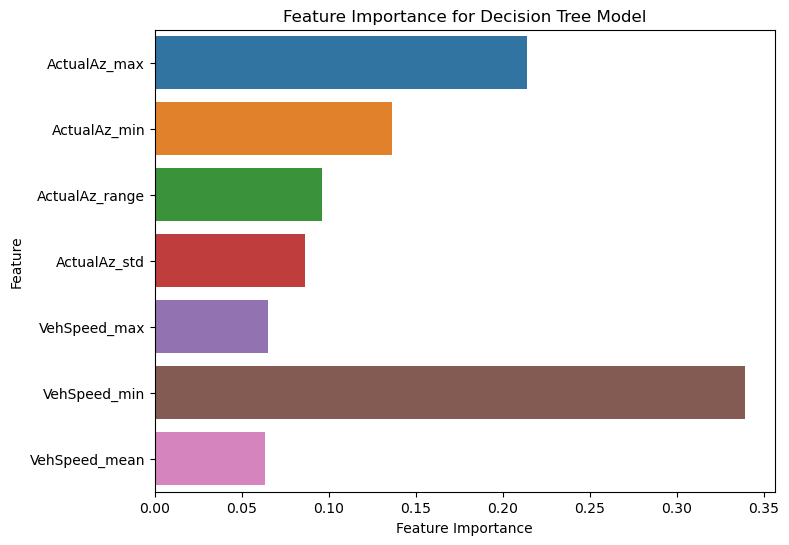

In [761]:
# Visualize feature importance for Decision Tree
plt.figure(figsize=(8, 6))
feature_importance_dt = dt_model.feature_importances_
sns.barplot(x=feature_importance_dt, y=x_over_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Decision Tree Model')
plt.show()


In [794]:
# Train random forest model
class_weights = {0: 1, 1: 100} 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=3,class_weight=class_weights)
rf_model.fit(x_over_train.values, y_over_train)

y_pred_rf_train = rf_model.predict(x_over_train.values)
y_pred_rf_test = rf_model.predict(X_test)

In [795]:
print(accuracy_score(y_over_train,y_pred_rf_train))
print("######"*20)
print(accuracy_score(y_test, y_pred_rf_test))

0.9442307140191208
########################################################################################################################
0.9437106918238993


In [796]:
print(confusion_matrix(y_over_train,y_pred_rf_train))
print('###'*30)
print(confusion_matrix(y_test, y_pred_rf_test))

[[64890  3852]
 [   33   887]]
##########################################################################################
[[23359   861]
 [  571   649]]


In [797]:
print(classification_report(y_over_train,y_pred_rf_train))
print('###'*30)
print(classification_report(y_test, y_pred_rf_test))   #recall for +ve class is 53%

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     68742
         1.0       0.19      0.96      0.31       920

    accuracy                           0.94     69662
   macro avg       0.59      0.95      0.64     69662
weighted avg       0.99      0.94      0.96     69662

##########################################################################################
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     24220
         1.0       0.43      0.53      0.48      1220

    accuracy                           0.94     25440
   macro avg       0.70      0.75      0.72     25440
weighted avg       0.95      0.94      0.95     25440



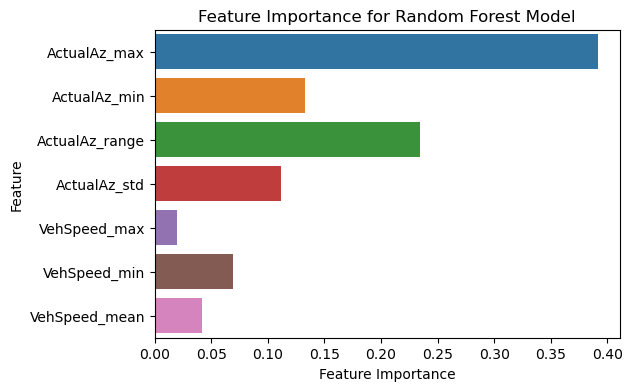

In [798]:
# Visualize feature importance for Random Forest
plt.figure(figsize=(6, 4))
feature_importance_rf = rf_model.feature_importances_
sns.barplot(x=feature_importance_rf, y=x_over_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.show()

### Hyperparameter Tuning 

In [799]:
clf=RandomForestClassifier(random_state=42)
param_grid={
    'n_estimators':[50,100],
    'criterion':['gini','entropy'],
    'max_depth':range(2,4),
    'max_features':['auto','sqrt'],
    'class_weight' : [{0: 1, 1: 100}, {0: 1, 1: 50}] }

grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,verbose=3,)
grid.fit(x_over_train.values, y_over_train)

   

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END class_weight={0: 1, 1: 100}, criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.913 total time=   1.6s
[CV 2/5] END class_weight={0: 1, 1: 100}, criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.943 total time=   1.7s
[CV 3/5] END class_weight={0: 1, 1: 100}, criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.808 total time=   1.6s
[CV 4/5] END class_weight={0: 1, 1: 100}, criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.886 total time=   1.6s
[CV 5/5] END class_weight={0: 1, 1: 100}, criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.964 total time=   1.6s
[CV 1/5] END class_weight={0: 1, 1: 100}, criterion=gini, max_depth=2, max_features=auto, n_estimators=100;, score=0.892 total time=   3.5s
[CV 2/5] END class_weight={0: 1, 1: 100}, criterion=gini, max_depth=2, max_features=auto, n_estimators=

[CV 4/5] END class_weight={0: 1, 1: 100}, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=100;, score=0.883 total time=   3.8s
[CV 5/5] END class_weight={0: 1, 1: 100}, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=100;, score=0.961 total time=   3.5s
[CV 1/5] END class_weight={0: 1, 1: 100}, criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.955 total time=   2.4s
[CV 2/5] END class_weight={0: 1, 1: 100}, criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.958 total time=   2.5s
[CV 3/5] END class_weight={0: 1, 1: 100}, criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.863 total time=   2.5s
[CV 4/5] END class_weight={0: 1, 1: 100}, criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.941 total time=   2.2s
[CV 5/5] END class_weight={0: 1, 1: 100}, criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.956 total time=   1.8s
[CV 

[CV 3/5] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.908 total time=   4.6s
[CV 4/5] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.956 total time=   4.5s
[CV 5/5] END class_weight={0: 1, 1: 50}, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=100;, score=0.974 total time=   4.2s
[CV 1/5] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.949 total time=   2.1s
[CV 2/5] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.953 total time=   2.2s
[CV 3/5] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.873 total time=   2.1s
[CV 4/5] END class_weight={0: 1, 1: 50}, criterion=entropy, max_depth=2, max_features=auto, n_estimators=50;, score=0.921 total time=   2.0s
[CV 5/5] END class_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 100}, {0: 1, 1: 50}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             verbose=3)

In [800]:
n_estimators=grid.best_params_['n_estimators']
criterion=grid.best_params_['criterion']
max_depth=grid.best_params_['max_depth']
max_features=grid.best_params_['max_features']
class_weight=grid.best_params_['class_weight']

In [801]:
print('n_estimators :', n_estimators)
print('criterion :',criterion)
print('max_depth :',max_depth)
print('max_features :',max_features)
print('class_weight :',class_weight)

n_estimators : 50
criterion : gini
max_depth : 3
max_features : auto
class_weight : {0: 1, 1: 50}


In [802]:
clf=RandomForestClassifier(n_estimators=n_estimators,
                              criterion=criterion,
                              max_depth=max_depth,
                              max_features=max_features,
                              class_weight=class_weight)
clf.fit(x_over_train.values,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 50}, max_depth=3, n_estimators=50)

In [803]:
y_pred_rf_train1 = clf.predict(x_over_train.values)
y_pred_rf_test1 = clf.predict(X_test)

In [804]:
print(accuracy_score(y_over_train,y_pred_rf_train1))
print("######"*20)
print(accuracy_score(y_test, y_pred_rf_test1))

0.959073813556889
########################################################################################################################
0.9522405660377359


In [805]:
print(confusion_matrix(y_over_train,y_pred_rf_train1))
print('###'*30)
print(confusion_matrix(y_test, y_pred_rf_test1))

[[65934  2808]
 [   43   877]]
##########################################################################################
[[23614   606]
 [  609   611]]


In [806]:
print(classification_report(y_over_train,y_pred_rf_train1))
print('###'*30)
print(classification_report(y_test, y_pred_rf_test1))  #recall for +ve class after tunning is 50%

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     68742
         1.0       0.24      0.95      0.38       920

    accuracy                           0.96     69662
   macro avg       0.62      0.96      0.68     69662
weighted avg       0.99      0.96      0.97     69662

##########################################################################################
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     24220
         1.0       0.50      0.50      0.50      1220

    accuracy                           0.95     25440
   macro avg       0.74      0.74      0.74     25440
weighted avg       0.95      0.95      0.95     25440



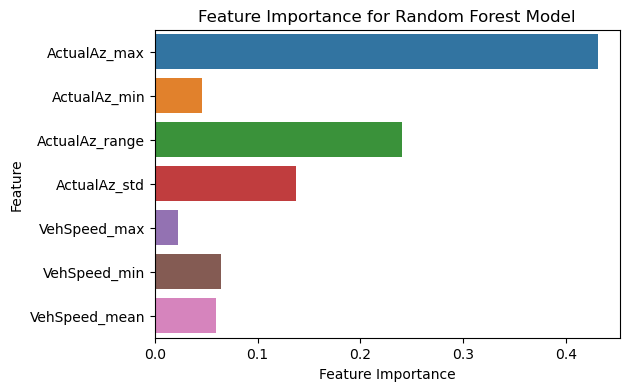

In [808]:
# Visualize feature importance for Random Forest hyperparamter tunning
plt.figure(figsize=(6, 4))
feature_importance_rf = clf.feature_importances_
sns.barplot(x=feature_importance_rf, y=x_over_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.show()

In [831]:
train_data.loc[(train_data['RealSpeedBreaker']==0) & (train_data['RealSpeedBreaker_max']==1),['RealSpeedBreaker','RealSpeedBreaker_max']]

# Need to change the strategy to overcome this pb.

,RealSpeedBreaker,RealSpeedBreaker_max
3881,0,1.0
3882,0,1.0
3883,0,1.0
3884,0,1.0
3885,0,1.0
...,...,...
77554,0,1.0
77555,0,1.0
77556,0,1.0
77557,0,1.0
